# Академия Аналитиков Авито

# Эконометрика

# Домашняя работа №3

## №1 (40 баллов)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('HW_003_001.txt')

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [5]:
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

y = df['Churn'].astype('int').values
X = df.drop('Churn', axis=1).values

- Ваше задание
    - Провести EDA анализ признаков, которые есть
    - Подумать над feature engineering, сформировать гипотезы
    - Зафиттить логистическую модель и пробит модель
    - Посмотреть на их метрики качества: псевдо $R^2$, confusion matrix, precision, recall, F1-score, ROC AUC
    - Какую модель вы бы выбрали?
    - Посмотреть на профиль среднего "клиента" (наблюдения). Какие переменные надо изменить, чтобы верояность ухода клиента снизилась?
    - Перейдем к предсказаниям:
        - У вас не всегда будут функции типа `LogisticRegressionCV`, поэтому почитайте про [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
        - Подумайте, какие еще признаки можно добавить в вашу модель. На этом этапе не бойтесь кол-ва признаков, чем больше, тем лучше. *{Дополнительно: почитайте про [`RFECV`](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py), попробуйте его применить}*
        - При наличии достаточного кол-ва наблюдений, хорошей стратегией является использование только части данных для расчета модели. Используя [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) выделите наблюдения для обучения.
        - Создайте стратифицированные фолды на обучающей выборке
        - На практике нам приходится выбирать между различными метриками качества. В этой задаче будем использовать ROC AUC
        - Используя `GridSearchCV` и [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression) подберите оптимальный гиперпараметр для l1, l2 регуляризаций. Помните, что вы хотите, чтобы оптимальный гиперпараметр был выбран согласно метрике ROC AUC. Почитайте, как это сделать в GridSearchCV
        - Нарисуйте графики, как меняется ваш score в зависимости от значения гиперпараметра

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score

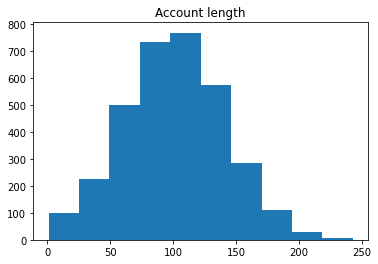

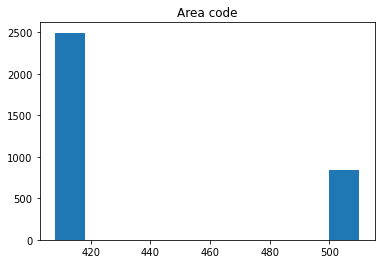

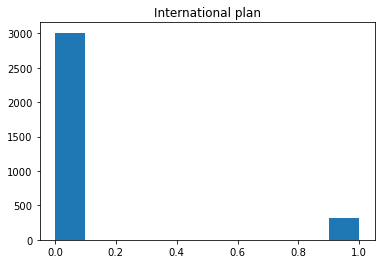

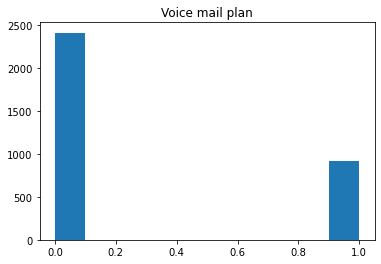

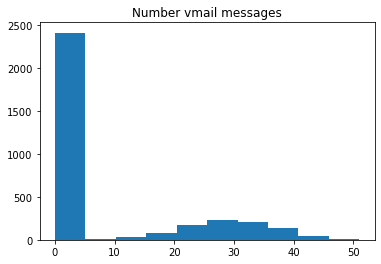

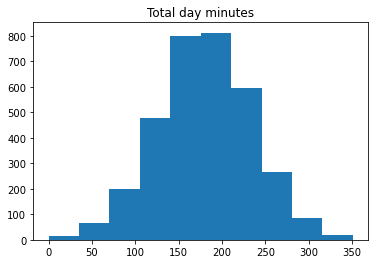

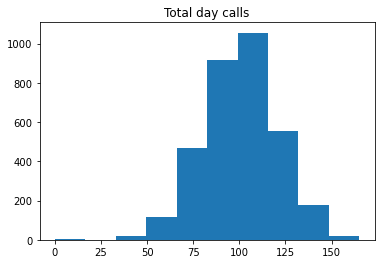

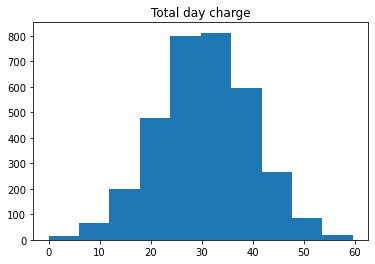

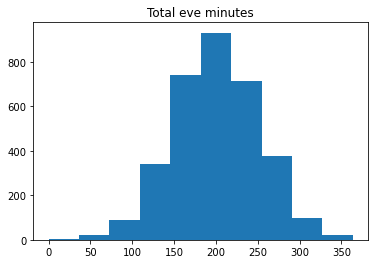

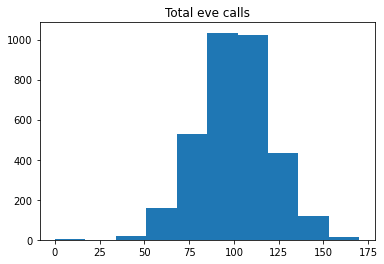

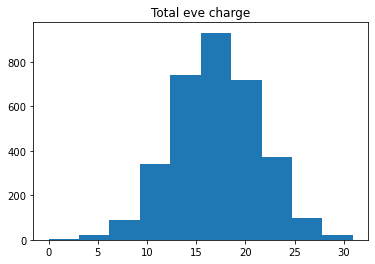

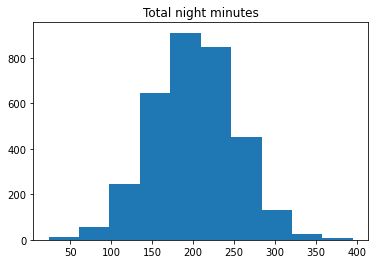

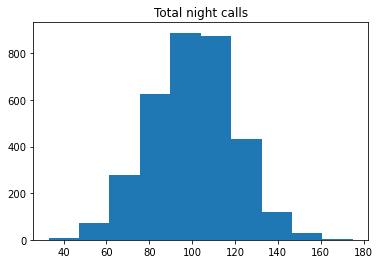

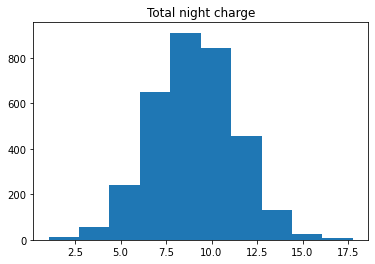

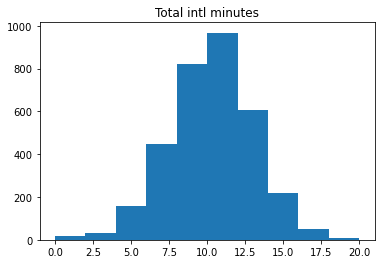

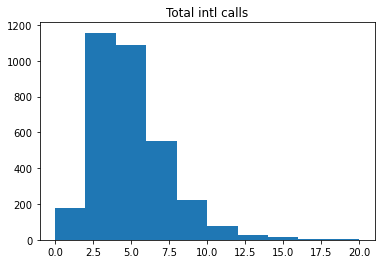

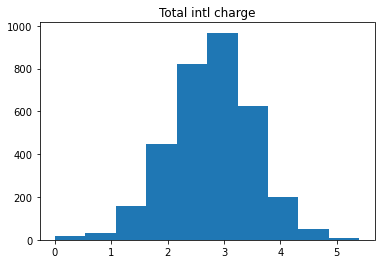

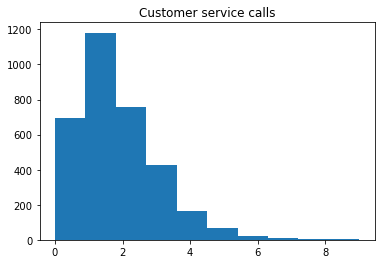

In [7]:
for column in df.columns[1:-1]:
    plt.title(column)
    plt.hist(df[column])
    plt.show()

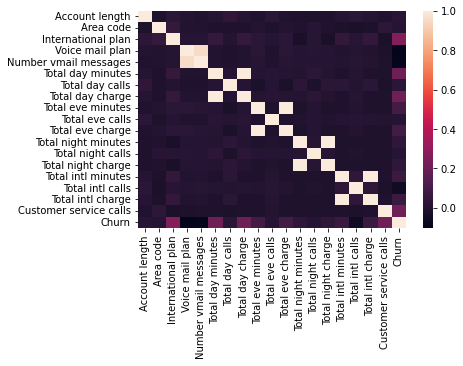

In [8]:
sns.heatmap(df.corr());

На данном этапе оставим только признаки, которые коррелируют с целевой переменной. 
Это достаточно интуитивные признаки, например, подключены ли роуминг/голосовая почта, сколько обращений было в службу поддержки, как много минут абонент тратил на звонки в течение суток.

Гипотеза в том, что такие признаки, как наличие роуминга и большего числа обращений в поддержку положительно влияют на отток (например, при поездке вне зоны обслуживания мобильного оператора качество услуг резко падает, а большое кол-во звонков в поддержку может означать то, что клиент часто сталкивается с проблемами или ему их медленно решают). 
Наличие голосовой почты кажется удобной услугой и вероятно снижает отток.
Про остальные признаки сложно сказать, но вероятно, что если люди отказываются от услуг оператора, значит им важна качественная мобильная связь и у них уже сложился негативный опыт взаимодействия с текущим оператором, то есть количество проговорённых минут должно быть выше среднего.

In [9]:
new_df = df.loc[:, ['International plan', 'Voice mail plan', 
                    'Total day minutes', 'Total eve minutes', 
                    'Total night minutes', 'Total intl minutes', 
                    'Total intl calls', 'Customer service calls']]

In [10]:
logit_mod = sm.Logit(endog=y, exog=sm.add_constant(new_df)).fit()
logit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.324865
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3324
Method:                           MLE   Df Model:                            8
Date:                Mon, 27 Mar 2023   Pseudo R-squ.:                  0.2149
Time:                        21:41:42   Log-Likelihood:                -1082.8
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                8.484e-123
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -8.0480      0.514    -15.648      0.000      -9.056      -7.040
International plan         2.0419      0.145     14.066      0.000       1.757       2.326
Voice mail plan           -0.9381      0.145     -6.478      0.000      -1.222      -0.654
Total day minutes          0.0130      0.001     12.018      0.000       0.011       0.015
Total eve minutes          0.0072      0.001      6.283      0.000       0.005       0.009
Total night minutes        0.0037      0.001      3.308      0.001       0.001       0.006
Total intl minutes         0.0874      0.020      4.296      0.000       0.048       0.127
Total intl calls          -0.0914      0.025     -3.664      0.000      -0.140      -0.043
Customer service calls     0.5126      0.039     13.109      0.000       0.436       0.589
==========================================================================================
"""

In [11]:
probit_mod = sm.Probit(endog=y, exog=sm.add_constant(new_df)).fit()
probit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.324836
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3333
Model:                         Probit   Df Residuals:                     3324
Method:                           MLE   Df Model:                            8
Date:                Mon, 27 Mar 2023   Pseudo R-squ.:                  0.2150
Time:                        21:41:42   Log-Likelihood:                -1082.7
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                7.711e-123
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -4.3282      0.265    -16.327      0.000      -4.848      -3.809
International plan         1.1736      0.082     14.275      0.000       1.012       1.335
Voice mail plan           -0.4726      0.075     -6.313      0.000      -0.619      -0.326
Total day minutes          0.0068      0.001     12.147      0.000       0.006       0.008
Total eve minutes          0.0036      0.001      5.955      0.000       0.002       0.005
Total night minutes        0.0018      0.001      3.026      0.002       0.001       0.003
Total intl minutes         0.0440      0.011      3.970      0.000       0.022       0.066
Total intl calls          -0.0432      0.013     -3.359      0.001      -0.068      -0.018
Customer service calls     0.2910      0.021     13.837      0.000       0.250       0.332
==========================================================================================
"""

Посмотрим на метрики сначала logit модели, а затем probit.

In [12]:
y_pred_logit = np.where(logit_mod.predict(sm.add_constant(new_df)) > 0.5, 1, 0)
y_pred_probit = np.where(probit_mod.predict(sm.add_constant(new_df)) > 0.5, 1, 0)

In [13]:
confusion_matrix(y_true = y, y_pred=y_pred_logit)

array([[2773,   77],
       [ 379,  104]])

In [14]:
TP_logit = np.sum((y_pred_logit == 1) & (y == 1)) 
FP_logit = np.sum((y_pred_logit == 1) & (y == 0))
FN_logit = np.sum((y_pred_logit == 0) & (y == 1))
TN_logit = np.sum((y_pred_logit == 0) & (y == 0))

precision_logit = round(TP_logit/(TP_logit + FP_logit), 3)
recall_logit = round(TP_logit/(TP_logit + FN_logit), 3)
f1_logit = round(f1_score(y_true = y, y_pred= y_pred_logit), 3)
fpr, tpr, threshold = roc_curve(y, y_pred_logit)
roc_auc_logit = round(auc(fpr, tpr), 3)
print(f'Precision: {precision_logit}, recall: {recall_logit}, f1: {f1_logit}, ROC-AUC: {roc_auc_logit}')

Precision: 0.575, recall: 0.215, f1: 0.313, ROC-AUC: 0.594


In [15]:
confusion_matrix(y_true = y, y_pred=y_pred_probit)

array([[2780,   70],
       [ 388,   95]])

In [16]:
TP_probit = np.sum((y_pred_probit == 1) & (y == 1)) 
FP_probit = np.sum((y_pred_probit == 1) & (y == 0))
FN_probit = np.sum((y_pred_probit == 0) & (y == 1))
TN_probit = np.sum((y_pred_probit == 0) & (y == 0))

precision_probit = round(TP_probit/(TP_probit + FP_probit), 3)
recall_probit = round(TP_probit/(TP_probit + FN_probit), 3)
f1_probit = round(f1_score(y_true = y, y_pred= y_pred_probit), 3)
fpr, tpr, threshold = roc_curve(y, y_pred_probit)
roc_auc_probit = round(auc(fpr, tpr), 3)
print(f'Precision: {precision_probit}, recall: {recall_probit}, f1: {f1_probit}, ROC-AUC: {roc_auc_probit}')

Precision: 0.576, recall: 0.197, f1: 0.293, ROC-AUC: 0.586


В данном случае я предпочитаю использовать logit модель, так как у неё лучше f1-score, а в задаче предсказания churn'а нам важны одновременно и precision, и recall.
Возможно даже recall более предпочтителен, так как нам важно детектировать как можно больше кандидатов на отток.
Так же в задаче нам важна метрика roc_auc, а она у первой модели тоже больше.

Посмотрим, какие переменные надо изменить у среднего клиента, чтобы вероятность ухода снизилась.

In [17]:
logit_mod.get_margeff(at = 'mean').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                      y
Method:                          dydx
At:                              mean
==========================================================================================
                            dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
International plan         0.1679      0.013     13.111      0.000       0.143       0.193
Voice mail plan           -0.0772      0.012     -6.660      0.000      -0.100      -0.054
Total day minutes          0.0011   8.56e-05     12.489      0.000       0.001       0.001
Total eve minutes          0.0006   9.23e-05      6.385      0.000       0.000       0.001
Total night minutes        0.0003   9.06e-05      3.327      0.001       0.000       0.000
Total intl minutes         0.0072      0.002      4.321      0.000       0.004       0.010
Total intl calls          -0.0075      0.002     -3.691      0.000      -0.012      -0.004
Customer service calls     0.0422      0.003     13.160      0.000       0.036       0.048
==========================================================================================
"""

Видим, что international plan у клиента имеет положительный эффект на Churn, так же как и количество звонок в Customer service. 
Voice mail plan же имеет отрицательный эффект на целевую переменную.

In [18]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression

Давайте добавим dummy-признаки, отвечающие за штат.
Если что, отсеем какие-то с помощью RFECV.

In [19]:
new_df['State'] = df['State']
new_df = pd.get_dummies(new_df, columns=['State'], drop_first=True)

Разобьём датасет в отношении 4:1 на обучение/тест.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(new_df.values, y, test_size=0.2, random_state=7)

Посмотрим, нужно ли отбрасывать какой-то из признаков, опираясь на метрику ROC-AUC.
Solver в логистической модели взяла liblinear по рекомендации из sklearn'а (хорошо работает на небольший датасетах, поддерживает L1/L2 регуляризацию).

In [21]:
clf = LogisticRegression(solver='liblinear')
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring='roc_auc',
    min_features_to_select=1,
)
selector = rfecv.fit(X_train, y_train)
print(selector.n_features_, selector.get_support())

58 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


Кажется признаки отбрасывать не нужно.

Теперь подберём гиперпараметры регуляризации для модели.

In [22]:
model = LogisticRegression(solver='liblinear')
parameters = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.05, 0.1, 0.5, 1.0]}
cv = StratifiedKFold(5)
clf = GridSearchCV(estimator=model, param_grid=parameters, 
                   scoring='roc_auc', cv=cv, verbose=1)
clf.fit(X_train, y_train)
clf.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'C': 0.5, 'penalty': 'l1'}

Нашли оптимальную регуляризацию, теперь давайте отобразим изменение roc_auc_score в зависимости от изменения гиперпараметров.

In [23]:
results = pd.DataFrame(clf.cv_results_['mean_test_score'], columns=['mean_test_score'])
params = clf.cv_results_['params']
results['C'] = [d['C'] for d in params]
results['penalty'] = [d['penalty'] for d in params]
argmax_l1 = np.argmax(results[results['penalty'] == 'l1']['mean_test_score'])
argmax_l2 = np.argmax(results[results['penalty'] == 'l2']['mean_test_score'])

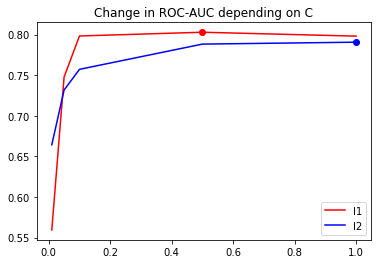

In [24]:
plt.plot(results[results['penalty'] == 'l1']['C'], 
         results[results['penalty'] == 'l1']['mean_test_score'], 
         color='red', label='l1')
plt.plot(results[results['penalty'] == 'l2']['C'], 
         results[results['penalty'] == 'l2']['mean_test_score'], 
         color='blue', label='l2')
plt.scatter(results[results['penalty'] == 'l1'].iloc[argmax_l1, 1], 
            results[results['penalty'] == 'l1'].iloc[argmax_l1, 0], 
            color='red')
plt.scatter(results[results['penalty'] == 'l2'].iloc[argmax_l2, 1], 
            results[results['penalty'] == 'l2'].iloc[argmax_l2, 0], 
            color='blue')
plt.title('Change in ROC-AUC depending on C')
plt.legend()
plt.show()

# №3 (60 баллов)

- Ладно, пришла пора для чего более сложного
- В этой задаче вы сами все решаете. Более того, у вас будут даже чужие ноутбуки
- Если вы проведете такой же анализ, что и выше, то балл за это задание будет равен 10/40
- Чтобы получить максимальный балл за это задание, то вам нужно будет провести полноценное исследование

- Итак, представьте себе следующую ситуацию
- Вы участвуете в создании продукта/модели по предсказанию инсульта 
- Вы - главный аналитик, который отвечает за создание модели и презентацию ее результатов
- Проблема в том, что вы единственный аналитик в команде. Все остальные члены команды **не имеют математического бэкграунда, они не знают никаких моделей, они никогда не занимались программированием**. Они все медики.
- Вы знаете, что для тестривания модели на первом этапе подойдет [этот](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) замечательный датасет. Там есть примеры различного анализа и моделей
- Но вы не можете просто взять примеры оттуда:
    - Во-первых, ваша модель должна быть логистической или пробит 
    - Во-вторых, посмотрите на то, как меняется вероятность инсульта в зависимости от характеристик пациента
    - В-третьих, подумайте над тем, как можно поменять/улучшить эту модель, чтобы обеспечить **наилучшее предсказание**. Подумайте, какую метрику вы будете использовать для этой задачи. Обоснуйте выбор метрики.
- Еще важный момент. Вы отправите, получившееся исследование команде, поэтому оно не должно быть большим (время на прочтение и понимание того, что происходит, не должно занимать более 10-15 минут). Помните, что у команды есть и другие задачи, поэтому позаботьтесь, чтобы исследование было:
    - Структурированным. Можете использовать [классический](https://blogs.lse.ac.uk/impactofsocialsciences/2018/05/21/writing-a-page-turner-how-to-tell-a-story-in-your-scientific-paper/) подход к научному исследованию и добавить то, как делают [консультанты](https://strategyu.co/mckinsey-structured-problem-solving-secrets/)
    - Отвечало на поставленную задачу
    - Было самодостаточным (в одном jupyter файле, проще говоря)
    - Воспроизводимым (увижу, что явно не прописываете `seed`, если/где надо, поставлю 0 за это задание)
    - Было не стыдно показать другим людям (если графики будут без подписей осей и названия, как минимум, поставлю 0)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

np.random.seed(7)

In [26]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Давайте преобразуем немного данные: например, бинарные признаки переведём в формат 1/0 (это колонки **ever_married**, **gender** и **Residence_type**), а так же сделаем one-hot encoding для остальных категориальных признаков.
Так же выбросим наблюдения, где мы не знаем пола человека (такое в нашем датасете единственно), так как пол может быть важным признаком и пропуск на этом месте нельзя ничем заменить.
В то же время у нас примерно 200 значений с пропущенным **bmi**, давайте в них поставим среднее значение по столбцу.
Ещё отнормируем количественные признаки, так как из-за масштаба они могут оказывать сильное влияние на целевую переменную.

In [27]:
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df = df[df['gender'] != 'Other'] # Выкидываем наблюдение без пола
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})
df['bmi'] = df['bmi'].fillna(df['bmi'].mean()) # Заполняем пробелы в bmi средним
# Нормируем количественные признаки
df.iloc[:, [2, 8, 9]] = df.iloc[:, [2, 8, 9]].apply(lambda x: (x - x.mean())/x.std()) 
# Создаём dummy переменные
new_df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=True)
# Смотрим соотношение классов
new_df['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [28]:
X = new_df.drop(['id', 'stroke'], axis=1)
Y = new_df['stroke']

In [29]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,1.051139,0,1,1,1,2.706185,1.000936e+00,0,1,0,0,1,0,0
1,0,0.785812,0,0,1,0,2.121444,1.476791e-14,0,0,1,0,0,1,0
2,1,1.626015,0,1,1,0,-0.004867,4.683463e-01,0,1,0,0,0,1,0
3,0,0.255157,0,0,1,1,1.437332,7.151561e-01,0,1,0,0,0,0,1
4,0,1.581794,1,0,1,0,1.501150,-6.358029e-01,0,0,1,0,0,1,0


Давайте посмотрим на распределения количественных признаков относительно целевой переменной, а так же корреляцию с целевой переменной.

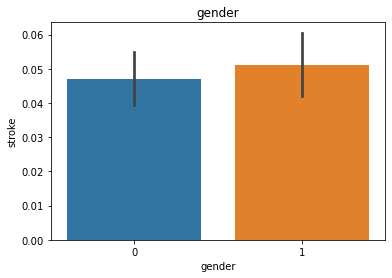

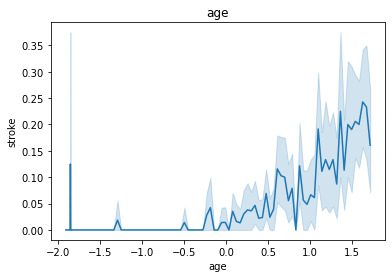

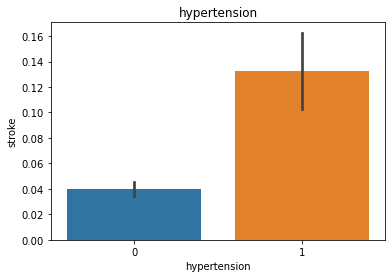

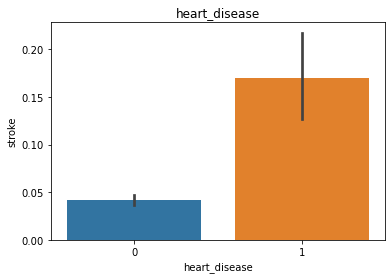

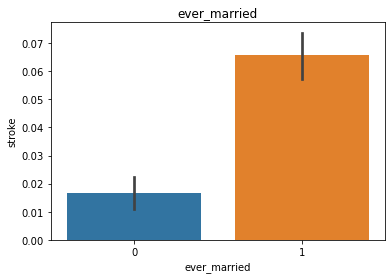

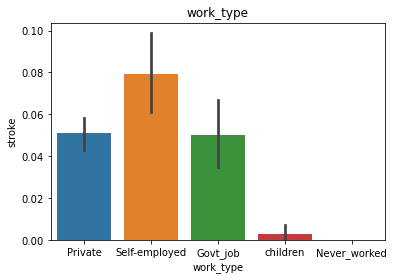

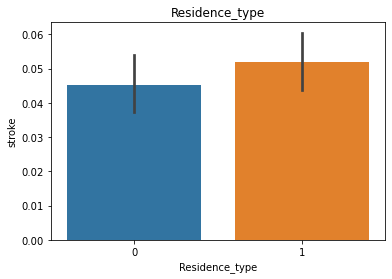

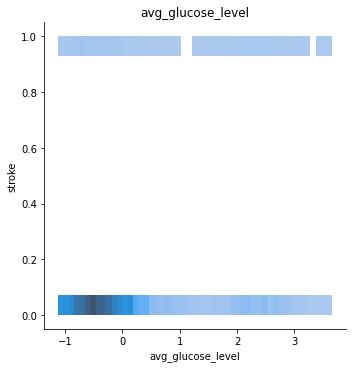

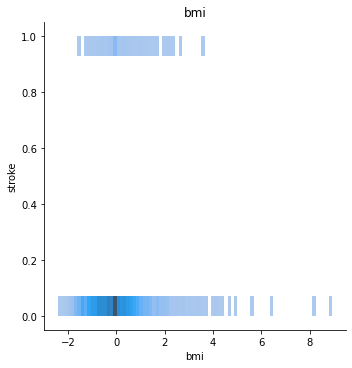

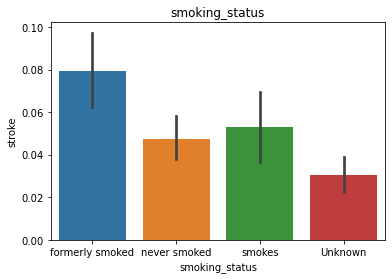

In [30]:
for column in df.columns[1:-1]:
    if column in ['age']:
        sns.lineplot(data=df, x=column, y='stroke').set(title=column)
    elif column in ['avg_glucose_level', 'bmi']:
        sns.displot(data=df, x=column, y='stroke').set(title=column)
    else:
        sns.barplot(data=df, x=column, y='stroke').set(title=column)
    plt.show()

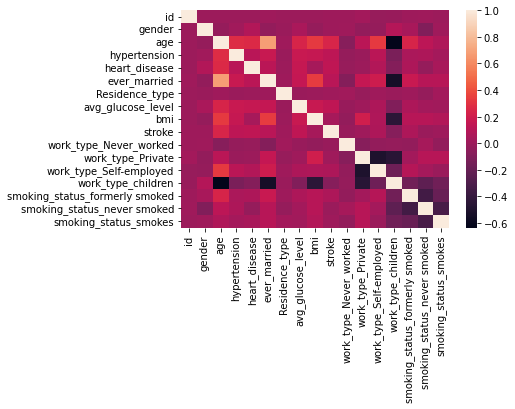

In [31]:
sns.heatmap(new_df.corr());

Видим, что датасет очень не сбалансированный, то есть людей с инфарктом очень мало, что может помешать модели хорошо классифицировать (например, для бинарной классификации модель может решить, что ей лучше просто всегда выдавать самый популярный класс, нежели искать сложные зависимости в данных).
Чтобы это избежать, я использую технику SMOTE, где мы искусственно можем контролировать доли классов в датасете.

In [32]:
# !pip install imblearn

In [33]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=7, stratify=Y)

In [35]:
# Смотрим, соотношение классов до
y_train.value_counts()

0    1457
1      75
Name: stroke, dtype: int64

In [36]:
smote = SMOTE(random_state=7)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [37]:
# Смотрим, соотношение классов после
y_train.value_counts()

0    1457
1    1457
Name: stroke, dtype: int64

Теперь нужно подобрать признаки для модели. 
Исходя из графиков выше на целевую переменную больше всего оказывают влиятние следующие признаки: age, hypertension, heart_disease, ever_married (не будем брать из-за сильной корреляции с age), avg_glucose_level, bmi, self-employed, formerly_smoked.

В качестве главной метрики будем брать recall.
Выбор метрики объясняется тем, что это отрасль здравоохранение, и нам не так страшно отправить человека на повторное обследование, как, скажем, не заметить риски инфаркта.

В качестве модели будем по классике брать логистическую регрессию, а кросс-валидацию для подбора гиперпараметров осуществлять на стратифицированных фолдах.

In [38]:
list(enumerate(X_train.columns))

[(0, 'gender'),
 (1, 'age'),
 (2, 'hypertension'),
 (3, 'heart_disease'),
 (4, 'ever_married'),
 (5, 'Residence_type'),
 (6, 'avg_glucose_level'),
 (7, 'bmi'),
 (8, 'work_type_Never_worked'),
 (9, 'work_type_Private'),
 (10, 'work_type_Self-employed'),
 (11, 'work_type_children'),
 (12, 'smoking_status_formerly smoked'),
 (13, 'smoking_status_never smoked'),
 (14, 'smoking_status_smokes')]

In [39]:
# Выбираем нужные колонки
X_train = X_train.iloc[:, [1, 2, 3, 6, 7, 10, 12]]
X_test = X_test.iloc[:, [1, 2, 3, 6, 7, 10, 12]]

Далее давайте попробуем подобрать оптимальные гиперпараметры логистической регрессии.

In [40]:
model = LogisticRegression(solver='liblinear')
parameters = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.05, 0.1, 0.5, 1.0]}
cv = StratifiedKFold(5)
clf = GridSearchCV(estimator=model, param_grid=parameters, 
                   scoring='recall', cv=cv, verbose=1)
clf.fit(X_train, y_train)
clf.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'C': 0.01, 'penalty': 'l1'}

Построим график изменения recall'а в зависимости от параметра.

In [41]:
results = pd.DataFrame(clf.cv_results_['mean_test_score'], columns=['mean_test_score'])
params = clf.cv_results_['params']
results['C'] = [d['C'] for d in params]
results['penalty'] = [d['penalty'] for d in params]
argmax_l1 = np.argmax(results[results['penalty'] == 'l1']['mean_test_score'])
argmax_l2 = np.argmax(results[results['penalty'] == 'l2']['mean_test_score'])

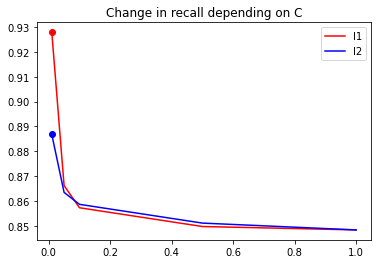

In [42]:
plt.plot(results[results['penalty'] == 'l1']['C'], 
         results[results['penalty'] == 'l1']['mean_test_score'], 
         color='red', label='l1')
plt.plot(results[results['penalty'] == 'l2']['C'], 
         results[results['penalty'] == 'l2']['mean_test_score'], 
         color='blue', label='l2')
plt.scatter(results[results['penalty'] == 'l1'].iloc[argmax_l1, 1], 
            results[results['penalty'] == 'l1'].iloc[argmax_l1, 0], 
            color='red')
plt.scatter(results[results['penalty'] == 'l2'].iloc[argmax_l2, 1], 
            results[results['penalty'] == 'l2'].iloc[argmax_l2, 0], 
            color='blue')
plt.title('Change in recall depending on C')
plt.legend()
plt.show()

Посмотрим на качество на тестовой выборке.

In [43]:
clf.score(X_test, y_test)

0.8563218390804598

In [44]:
confusion_matrix(y_true = y_test, y_pred=clf.predict(X_test))

array([[2304, 1099],
       [  25,  149]])

Теперь посмотрим, какой эффект оказывают предсказательные переменные на целевую.
Будем вычислять маргинальный эффект для среднего человека.
Формула для маргинального эффекта с лекции:
- $Z = X \beta$
- $p = \frac{1}{1 + e^{-Z}}$
- $f(Z) = \frac{dp}{dZ} = \frac{e^{-Z}}{(1 + e^{-Z})^{2}}$ (производная пробит функции)
- $\frac{dp}{dX} = \frac{dp}{dZ} \cdot \frac{dZ}{dX} = f(Z) \cdot \beta$

In [45]:
def calculate_mean_effects(clf, X):
    coef = clf.best_estimator_.coef_
    Z = coef @ X_final.mean().values + clf.best_estimator_.intercept_
    exp = np.exp(-Z)
    effects = pd.DataFrame(X.columns, columns=['Feature_name'])
    effects['dy/dx'] = [np.round(exp * c / (1 + exp)**2, 3) for c in coef][0]
    return effects

In [46]:
# Средний человек по всему датасету по предсказательным переменным.
X_final = new_df.loc[:, X_train.columns]
effects = calculate_mean_effects(clf, X_final)
effects

,Feature_name,dy/dx
0,age,0.296
1,hypertension,0.000
2,heart_disease,0.000
3,avg_glucose_level,0.023
4,bmi,0.000
5,work_type_Self-employed,0.000
6,smoking_status_formerly smoked,0.000


Видим, что для среднего человека всего 2 признака оказывают эффект на предсказание у него инсульта. 
Это его возраст и уровень глюкозы.